Student Data:
       Name  Marks
0    Alice     85
1      Bob     78
2  Charlie     92
3    David     88


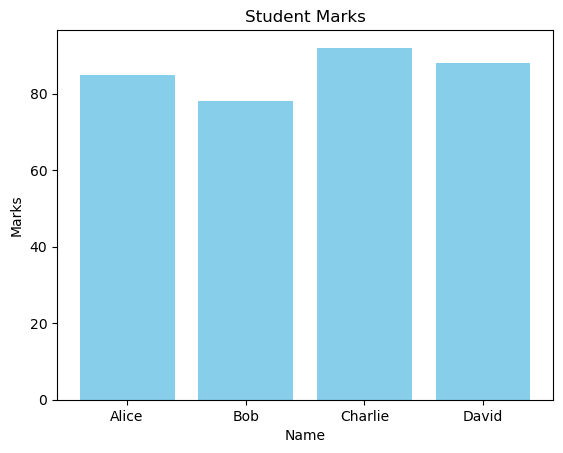

In [1]:
#marks of students

import pandas as pd
import matplotlib.pyplot as plt

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'], 
        'Marks': [85, 78, 92, 88]}
df = pd.DataFrame(data)

print("Student Data:\n", df)

# Plotting
plt.bar(df['Name'], df['Marks'], color='skyblue')
plt.title("Student Marks")
plt.xlabel("Name")
plt.ylabel("Marks")
plt.show()

In [3]:
#calculator

def calculator():
    print("Simple Calculator")
    print("Choose operation: +, -, *, /")
    operation = input("Enter operation: ")
    num1 = float(input("Enter first number: "))
    num2 = float(input("Enter second number: "))
    
    if operation == '+':
        print(f"Result: {num1 + num2}")
    elif operation == '-':
        print(f"Result: {num1 - num2}")
    elif operation == '*':
        print(f"Result: {num1 * num2}")
    elif operation == '/':
        print(f"Result: {num1 / num2 if num2 != 0 else 'Error: Division by zero'}")
    else:
        print("Invalid operation")
        
calculator()

Simple Calculator
Choose operation: +, -, *, /


Enter operation:  +
Enter first number:  6
Enter second number:  79


Result: 85.0


In [5]:
import requests

def get_weather(city):
    api_key = "15339075c6f024ea752b0af7bf5a253b"  # Sign up at OpenWeatherMap for a free API key
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    
    if data.get("main"):
        print(f"City: {data['name']}")
        print(f"Temperature: {data['main']['temp']}°C")
        print(f"Weather: {data['weather'][0]['description']}")
    else:
        print("City not found!")

city = input("Enter city name: ")
get_weather(city)

Enter city name:  london


City not found!


In [11]:
!pip install pygame

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.4/10.6 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.6 MB 5.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.6 MB 6.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 6.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/10.6 MB 7.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.7/10.6 MB 7.8 MB/s eta 0:00:02
   ------------ --------------------------- 3.2/10.6 MB 8.2 MB/s eta 0:00:01
   -------------- ------------------------- 3.7/10.6 MB 8.8 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.6 MB 9.0 MB/s eta 0:00:01
   -----------------

In [14]:
import pygame
import time
import random

# Initialize pygame
pygame.init()

# Screen dimensions
width, height = 600, 400
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Snake Game")

# Colors
white = (255, 255, 255)
black = (0, 0, 0)
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)

# Snake settings
snake_block = 10
snake_speed = 15

# Font
font_style = pygame.font.SysFont("bahnschrift", 25)
score_font = pygame.font.SysFont("comicsansms", 35)

# Functions
def score_display(score):
    value = score_font.render("Your Score: " + str(score), True, blue)
    screen.blit(value, [0, 0])

def our_snake(snake_block, snake_list):
    for x in snake_list:
        pygame.draw.rect(screen, green, [x[0], x[1], snake_block, snake_block])

def message(msg, color):
    mesg = font_style.render(msg, True, color)
    screen.blit(mesg, [width / 6, height / 3])

# Main game function
def gameLoop():
    game_over = False
    game_close = False

    x1, y1 = width / 2, height / 2
    x1_change, y1_change = 0, 0

    snake_list = []
    length_of_snake = 1

    foodx = round(random.randrange(0, width - snake_block) / 10.0) * 10.0
    foody = round(random.randrange(0, height - snake_block) / 10.0) * 10.0

    clock = pygame.time.Clock()

    while not game_over:
        while game_close:
            screen.fill(black)
            message("You Lost! Press C-Play Again or Q-Quit", red)
            score_display(length_of_snake - 1)
            pygame.display.update()

            for event in pygame.event.get():
                if event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_q:
                        game_over = True
                        game_close = False
                    if event.key == pygame.K_c:
                        gameLoop()

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                game_over = True
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    x1_change, y1_change = -snake_block, 0
                elif event.key == pygame.K_RIGHT:
                    x1_change, y1_change = snake_block, 0
                elif event.key == pygame.K_UP:
                    x1_change, y1_change = 0, -snake_block
                elif event.key == pygame.K_DOWN:
                    x1_change, y1_change = 0, snake_block

        if x1 >= width or x1 < 0 or y1 >= height or y1 < 0:
            game_close = True
        x1 += x1_change
        y1 += y1_change
        screen.fill(black)

        pygame.draw.rect(screen, red, [foodx, foody, snake_block, snake_block])
        snake_head = [x1, y1]
        snake_list.append(snake_head)
        if len(snake_list) > length_of_snake:
            del snake_list[0]

        for block in snake_list[:-1]:
            if block == snake_head:
                game_close = True

        our_snake(snake_block, snake_list)
        score_display(length_of_snake - 1)

        pygame.display.update()

        if x1 == foodx and y1 == foody:
            foodx = round(random.randrange(0, width - snake_block) / 10.0) * 10.0
            foody = round(random.randrange(0, height - snake_block) / 10.0) * 10.0
            length_of_snake += 1

        clock.tick(snake_speed)

    pygame.quit()
    quit()

gameLoop()

error: display Surface quit